In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.decomposition import KernelPCA
import numpy.matlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
file_name = r'E:\Advanced Computational Finance\quizze\Q2\Q2\SP_2010__baby.csv'
stock_data = pd.read_csv(file_name, sep = ',')
stock_data.pop('Symbol')
stock_data.pop('Sector')
stock_data.set_index([ 'Name'], inplace = True)
name_list = stock_data.index.tolist()
variables_name = stock_data.columns.values.tolist()
stock_data

,Price,Earnings/Share,Book Value,52 week low,52 week high,Market Cap,EBITDA,Price/Sales
Name,,,,,,,,
3M Company,177.12,7.78,19.34,134.00,177.79,107.43,8.57000,3.52
Abbott Laboratories,41.89,1.62,14.10,36.00,51.74,61.54,4.40000,2.98
AbbVie,64.16,3.33,2.87,45.45,71.60,103.77,10.30000,4.31
Accenture plc,115.11,5.92,11.45,88.43,120.78,71.66,5.42000,2.17
Activision Blizzard,41.29,1.11,11.31,24.04,41.32,30.48,1.59000,6.16
Acuity Brands Inc,264.62,6.12,36.50,168.33,265.10,11.51,0.53650,3.53
Adobe Systems Inc,96.79,1.77,14.53,71.27,100.56,48.23,1.53000,8.93
Advance Auto Parts,164.85,6.40,35.82,131.59,201.24,12.10,1.24000,1.22
AES Corp,12.32,0.43,4.86,8.22,13.38,8.12,3.57000,0.55


In [3]:
s_matrix = pd.DataFrame.as_matrix(stock_data)
s_scaled = preprocessing.scale(s_matrix[:,0:])
s_scaled.shape

(436L, 8L)

In [4]:
#KPCA

kpca  = KernelPCA(kernel = 'rbf', fit_inverse_transform = True, gamma = 15)
s_kpca = kpca.fit(s_scaled)
Alpha = s_kpca.alphas_
print 'Eigenvectors of Kernel Matrix is:\n'+str(Alpha)

Eigenvectors of Kernel Matrix is:
[[ -1.23982339e-02   4.92858782e-03  -4.04729114e-03 ...,   2.61695264e-06
    1.44263602e-05  -1.79885491e-06]
 [ -1.25937124e-02   5.08393830e-03  -4.20344938e-03 ...,   1.56677450e-06
    1.02560808e-04  -1.72582820e-06]
 [ -1.23982382e-02   4.92859082e-03  -4.04729406e-03 ...,   2.61694910e-06
    1.44263412e-05  -1.79885253e-06]
 ..., 
 [ -1.23982777e-02   4.92861888e-03  -4.04732135e-03 ...,   2.61691585e-06
    1.44261614e-05  -1.79883014e-06]
 [ -1.42985760e-02   6.41595943e-03  -5.58619629e-03 ...,   5.43755133e-07
    8.96106823e-06  -2.85195496e-05]
 [ -1.31469887e-02   5.39174255e-03  -4.62091899e-03 ...,   3.28109004e-06
    1.26437660e-05  -1.57674840e-06]]


In [5]:
newData = kpca.fit_transform(s_scaled)
newData

array([[ -2.75198228e-02,   8.82276283e-03,  -6.84840247e-03, ...,
          4.01302200e-07,   9.00356336e-07,  -1.01776123e-07],
       [ -2.79537179e-02,   9.10085881e-03,  -7.11263709e-03, ...,
          2.40260387e-07,   6.40087115e-06,  -9.76443966e-08],
       [ -2.75198321e-02,   8.82276820e-03,  -6.84840741e-03, ...,
          4.01301658e-07,   9.00355145e-07,  -1.01775988e-07],
       ..., 
       [ -2.75199199e-02,   8.82281842e-03,  -6.84845358e-03, ...,
          4.01296558e-07,   9.00343926e-07,  -1.01774721e-07],
       [ -3.17379299e-02,   1.14853362e-02,  -9.45237670e-03, ...,
          8.33832939e-08,   5.59264737e-07,  -1.61358715e-06],
       [ -2.91818013e-02,   9.65186529e-03,  -7.81903547e-03, ...,
          5.03145770e-07,   7.89103744e-07,  -8.92097174e-08]])

In [6]:
fig1, ax = plt.subplots()
x = Alpha[:,0]
y = Alpha[:,1]
ax.scatter(x, y, 5, c=(1,0,0), alpha = 0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Biplot')
for i, text in enumerate(name_list):
    ax.annotate(text, (x[i], y[i]))


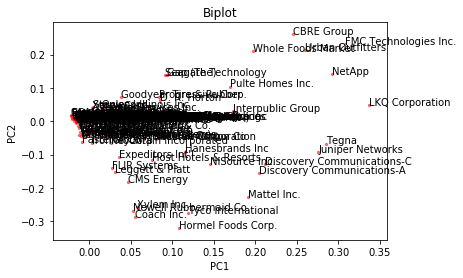

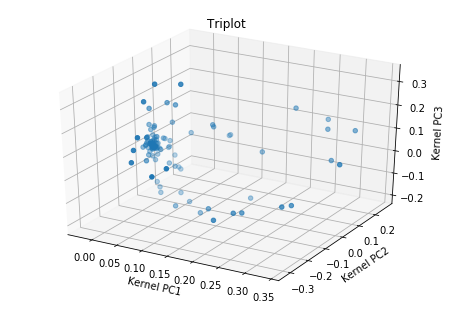

In [7]:
fig2 = plt.figure()
ax2 = Axes3D(fig2)
ax2.scatter(Alpha[:,0], Alpha[:,1], Alpha[:,2])
ax2.set_xlabel('Kernel PC1')
ax2.set_ylabel('Kernel PC2')
ax2.set_zlabel('Kernel PC3')
ax2.set_title('Triplot')

plt.show()

In [8]:
Alpha = pd.DataFrame(Alpha)
Alpha = Alpha.loc[:,0:2]
Alpha.columns = ['PC1','PC2','PC3']
Alpha['score'] = None
stock_data['Score'] = None

Alpha['name'] = name_list
Alpha.set_index('name', inplace = True)
for i in name_list:
    per_score = (Alpha.at[i,'PC1']**2+Alpha.at[i,'PC2']**2+Alpha.at[i,'PC3']**2)**0.5
    Alpha.at[i,'score'] =per_score
    stock_data.at[i, 'Score'] = per_score
sorted_1 = Alpha.sort_values('score', ascending = False)
print sorted_1
sorted_2 = stock_data.sort_values('Score', ascending = False)
print sorted_2

                                        PC1       PC2       PC3      score
name                                                                      
FMC Technologies Inc.              0.307800  0.231428  0.097622   0.397278
CBRE Group                         0.245105  0.262171  0.107853   0.374756
Expeditors Int'l                   0.035598 -0.107983  0.332219   0.351137
Urban Outfitters                   0.260334  0.214113  0.092045   0.349415
Hormel Foods Corp.                 0.107940 -0.321249  0.066165   0.345297
LKQ Corporation                    0.337754  0.049090  0.045275   0.344293
Flowserve Corporation              0.065948 -0.053208  0.320766    0.33177
Whole Foods Market                 0.197916  0.211917  0.159718   0.331043
NetApp                             0.292249  0.141369  0.000913   0.324647
Mattel Inc.                        0.191039 -0.227334 -0.130170   0.324223
Xylem Inc.                         0.057144 -0.257542  0.180523   0.319659
Leggett & Platt          

In [9]:
sorted_1.head(20)

,PC1,PC2,PC3,score
name,,,,
FMC Technologies Inc.,0.307800,0.231428,0.097622,0.397278
CBRE Group,0.245105,0.262171,0.107853,0.374756
Expeditors Int'l,0.035598,-0.107983,0.332219,0.351137
Urban Outfitters,0.260334,0.214113,0.092045,0.349415
Hormel Foods Corp.,0.107940,-0.321249,0.066165,0.345297
LKQ Corporation,0.337754,0.049090,0.045275,0.344293
Flowserve Corporation,0.065948,-0.053208,0.320766,0.33177
Whole Foods Market,0.197916,0.211917,0.159718,0.331043
NetApp,0.292249,0.141369,0.000913,0.324647


sorted_2

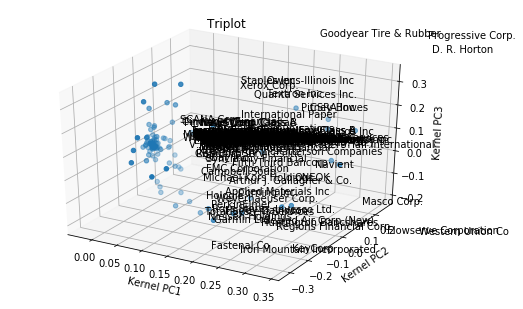

In [10]:
##fig3 = plt.figure()
##ax3 = Axes3D(fig3)


#x = Alpha[:,0]
#y = Alpha[:,1]
#z = Alpha[:,2]

#ax3.scatter(x, y, z)
#ax3.set_xlabel('Kernel PC1')
#ax3.set_ylabel('Kernel PC2')
#ax3.set_zlabel('Kernel PC3')
#ax3.set_title('Triplot')


#for i, text in enumerate(name_list):
#    ax3.annotate(text, (x[i], y[i]))
    
#fig3

In [10]:
sorted_2.head(20)

,Price,Earnings/Share,Book Value,52 week low,52 week high,Market Cap,EBITDA,Price/Sales,Score
Name,,,,,,,,,
FMC Technologies Inc.,26.36,1.15,11.51,22.30,37.90,5.97,0.80660,0.99,0.397278
CBRE Group,26.20,1.59,8.44,22.74,38.76,8.75,1.10000,0.71,0.374756
Expeditors Int'l,49.92,2.38,9.80,40.41,51.80,9.09,0.75024,1.41,0.351137
Urban Outfitters,29.09,1.80,10.02,19.26,36.99,3.41,0.49862,0.95,0.349415
Hormel Foods Corp.,36.61,1.45,8.12,28.44,45.72,19.40,1.33000,2.10,0.345297
LKQ Corporation,33.09,1.38,10.55,23.95,34.26,10.15,0.86290,1.34,0.344293
Flowserve Corporation,45.79,2.10,13.29,33.86,52.50,5.97,0.72875,1.30,0.33177
Whole Foods Market,33.58,1.47,10.11,28.07,41.97,10.78,1.39000,0.69,0.331043
NetApp,24.54,0.77,10.25,20.66,34.81,6.87,0.63100,1.21,0.324647


In [22]:
PC1 = Alpha.loc[:,'PC1']
PC1 = PC1.sort_values(ascending = False)
PC1

name
LKQ Corporation                     0.337754
FMC Technologies Inc.               0.307800
NetApp                              0.292249
Tegna                               0.285718
Juniper Networks                    0.276199
Urban Outfitters                    0.260334
CBRE Group                          0.245105
Discovery Communications-C          0.211297
Discovery Communications-A          0.204071
Whole Foods Market                  0.197916
Mattel Inc.                         0.191039
Interpublic Group                   0.172787
Pulte Homes Inc.                    0.169340
NiSource Inc.                       0.145179
Tyco International                  0.119261
Hanesbrands Inc                     0.115164
Hormel Foods Corp.                  0.107940
Gap (The)                           0.093332
Seagate Technology                  0.091342
D. R. Horton                        0.085232
Progressive Corp.                   0.083804
Western Union Co                    0.079871
Host 

In [23]:
PC2 = Alpha.loc[:,'PC2']
PC2 = PC2.sort_values(ascending = False)
PC2

name
CBRE Group                    0.262171
FMC Technologies Inc.         0.231428
Urban Outfitters              0.214113
Whole Foods Market            0.211917
NetApp                        0.141369
Gap (The)                     0.139346
Seagate Technology            0.137703
Pulte Homes Inc.              0.104177
Goodyear Tire & Rubber        0.073032
Progressive Corp.             0.071604
D. R. Horton                  0.062600
LKQ Corporation               0.049090
Staples Inc.                  0.043083
Owens-Illinois Inc            0.042875
Xerox Corp.                   0.039834
Textron Inc.                  0.034551
Quanta Services Inc.          0.033624
Interpublic Group             0.029591
CSRA Inc.                     0.025408
Pitney-Bowes                  0.025261
International Paper           0.020996
SCANA Corp                    0.017801
Cincinnati Financial          0.016792
Pinnacle West Capital         0.015797
AES Corp                      0.015775
News Corp. Class B  

In [24]:
PC3 = Alpha.loc[:,'PC3']
PC3 = PC3.sort_values(ascending = False)
PC3

name
Expeditors Int'l              0.332219
Flowserve Corporation         0.320766
Leggett & Platt               0.275492
Patterson Companies           0.203229
Robert Half International     0.197818
Harley-Davidson               0.186023
Xylem Inc.                    0.180523
Whole Foods Market            0.159718
CMS Energy                    0.143304
Newell Rubbermaid Co.         0.129992
CBRE Group                    0.107853
D. R. Horton                  0.106071
Michael Kors Holdings         0.103227
Textron Inc.                  0.100726
FMC Technologies Inc.         0.097622
Arthur J. Gallagher & Co.     0.096576
Progressive Corp.             0.092488
Urban Outfitters              0.092045
Carmax Inc                    0.088890
Coach Inc.                    0.087526
Tyco International            0.084581
FMC Corporation               0.079082
Sealed Air Corp.(New)         0.073008
Hormel Foods Corp.            0.066165
Ross Stores                   0.059403
Darden Restaurants  